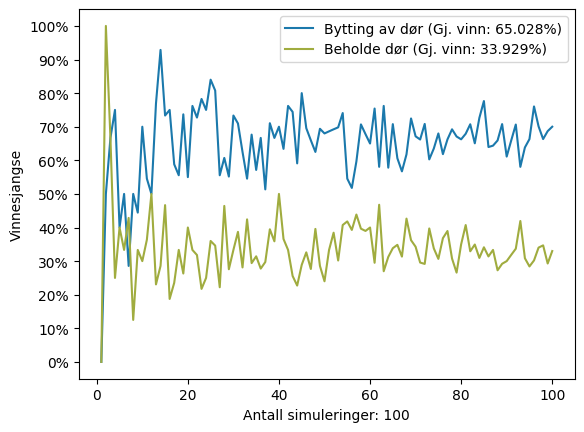

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from IPython.display import display, clear_output
import time

def monty_hall(num_simulations, switch):
    prize_doors = np.random.randint(0, 3, num_simulations)
    chosen_doors = np.random.randint(0, 3, num_simulations)
    open_doors = np.array([next(d for d in range(3) if d != chosen and d != prize)
                           for chosen, prize in zip(chosen_doors, prize_doors)])
    
    if switch:
        chosen_doors = np.array([next(d for d in range(3) if d != chosen and d != open_door)
                                 for chosen, open_door in zip(chosen_doors, open_doors)])
    
    wins = np.sum(chosen_doors == prize_doors)
    return wins / num_simulations

def plot_simulation_progress(num_simulations):
    fig, ax = plt.subplots()
    switch_probs = []
    dont_switch_probs = []
    
    for i in range(1, num_simulations + 1):
        switch_probs.append(monty_hall(i, True))
        dont_switch_probs.append(monty_hall(i, False))
        
        # oppdater for hver iterasjon de første 50, deretter hver 10. iterasjon
        if i <= 50 or i % 10 == 0:
            ax.clear()  
            
            mean_switch_prob = np.mean(switch_probs) #scuffed måte å gjøre det på. blir så tregt på 10k+ simuleringer
            mean_dont_switch_prob = np.mean(dont_switch_probs)
            
            # Plotting
            ax.plot(range(1, i + 1), switch_probs, label=f'Bytting av dør (Gj. vinn: {round(mean_switch_prob*100, 3)}%)', color='#1b79ac')
            ax.plot(range(1, i + 1), dont_switch_probs, label=f"Beholde dør (Gj. vinn: {round(mean_dont_switch_prob*100, 3)}%)", color='#a0ac3f')
        
            ax.set_ylim(-0.05, 1.05)
            
            # Format y ticks as percentage
            ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
            #ticks at 0, 10, 20, ..., 100
            ax.set_yticks(np.arange(0, 1.1, 0.1))
            
            ax.set_xlabel(f"Antall simuleringer: {i}")
            ax.set_ylabel('Vinnesjangse')
            ax.legend(loc='upper right')
            display(fig)
            clear_output(wait=True)
            
            #viser første 50 sakte før det går på maks hastighet
            if i <= 50:
                time.sleep(0.5)

    plt.close(fig)


plot_simulation_progress(100)
